<a href="https://colab.research.google.com/github/kandgesid/Data-Science-and-ML-projects/blob/master/multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True) 
from ipykernel import kernelapp as app

In [ ]:
data = pd.read_csv("C:\\Users\\siddhant\\Desktop\\data\\machine-learning-ex1\\ex1\\ex1data2.txt",dtype=np.float64)
data = np.array(data)
x = data[:,0:2]
y = data[:,-1:]
#print(x,y)
#x.shape

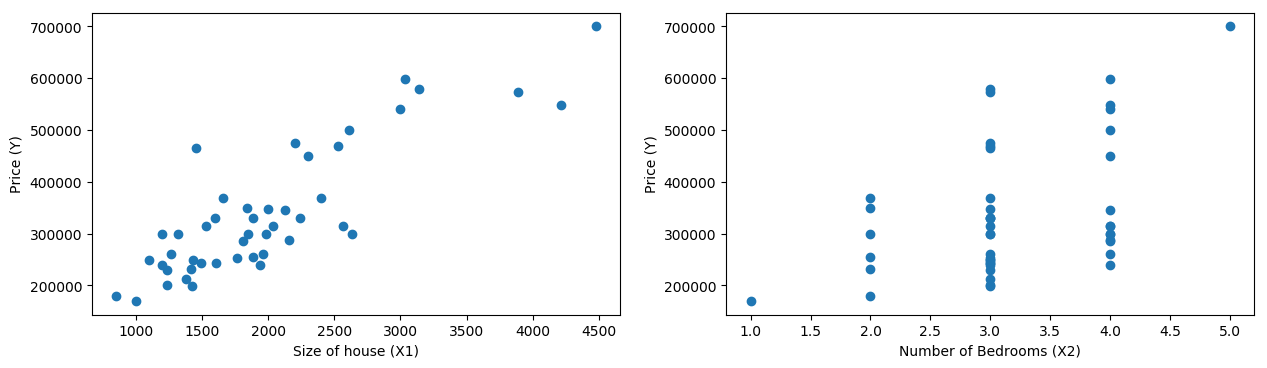

In [ ]:
plt.figure(figsize = (15,4),dpi=100)
plt.subplot(121)
plt.scatter(x[::,0:1],y)
plt.xlabel("Size of house (X1)")
plt.ylabel("Price (Y)")
plt.subplot(122)
plt.scatter(x[::,-1:],y)
plt.xlabel("Number of Bedrooms (X2)")
plt.ylabel("Price (Y)")
plt.show()


In [ ]:
theta = np.random.rand(1,3)
m,n = x.shape
x_bias = np.ones((m,n+1))
x_bias[::,1:] = x
print("X_bias = \n",x_bias[0:5,:])
print("Y = \n",y[0:5,::])

X_bias = 
 [[   1. 1600.    3.]
 [   1. 2400.    3.]
 [   1. 1416.    2.]
 [   1. 3000.    4.]
 [   1. 1985.    4.]]
Y = 
 [[329900.]
 [369000.]
 [232000.]
 [539900.]
 [299900.]]


In [ ]:
#feature scaling
mean_size = np.mean(x_bias[::,1:2])
std_size = np.std(x_bias[::,1:2])
mean_bedroom = np.mean(x_bias[::,2:])
std_bedroom = np.std(x_bias[::,2:])
x_bias[::,1:2] = (x_bias[::,1:2] - mean_size)/(std_size)
x_bias[::,2:] = (x_bias[::,2:] - mean_bedroom)/(std_bedroom)
print(x_bias,y)

[[ 1.         -0.50145768 -0.22866478]
 [ 1.          0.50539755 -0.22866478]
 [ 1.         -0.73303438 -1.54348727]
 [ 1.          1.26053896  1.08615771]
 [ 1.         -0.0169086   1.08615771]
 [ 1.         -0.58452323 -0.22866478]
 [ 1.         -0.71919012 -0.22866478]
 [ 1.         -0.77834286 -0.22866478]
 [ 1.         -0.634866   -0.22866478]
 [ 1.         -0.07354421  1.08615771]
 [ 1.          0.00196993 -0.22866478]
 [ 1.         -0.13647266 -0.22866478]
 [ 1.          3.12070399  2.40098019]
 [ 1.         -0.9193026  -0.22866478]
 [ 1.          0.37954064  1.08615771]
 [ 1.         -0.85385701 -1.54348727]
 [ 1.         -0.9595768  -0.22866478]
 [ 1.          0.76843847  1.08615771]
 [ 1.          1.2995546   1.08615771]
 [ 1.         -0.29127665 -0.22866478]
 [ 1.         -0.1389898  -1.54348727]
 [ 1.         -0.4964234  -0.22866478]
 [ 1.         -0.04585569  1.08615771]
 [ 1.          2.3806654  -0.22866478]
 [ 1.         -1.13074219 -0.22866478]
 [ 1.         -0.68017448

In [ ]:
def cost(x_bias,y,theta):
    m,n = x.shape
    hypothesis = x_bias.dot(theta.transpose())
    return (1/(2.0*m))*((np.square(hypothesis - y)).sum(axis = 0))

In [ ]:
#gradient descent
def gradient_descent(x_bias,y,theta,alpha,iteration):
    count = 1
    cost_log = np.array([])
    while(count <= iteration):
        hypothesis = x_bias.dot(theta.transpose())
        theta[0,0] = theta[0,0] - alpha*(1.0/m)*((hypothesis - y)*(x_bias[::,0:1])).sum(axis=0)
        theta[0,1] = theta[0,1] - alpha*(1.0/m)*((hypothesis - y)*(x_bias[::,1:2])).sum(axis=0)
        theta[0,2] = theta[0,2] - alpha*(1.0/m)*((hypothesis - y)*(x_bias[::,2:])).sum(axis=0)
        #theta[0,0] = temp0
        #theta[0,1] = temp1
        #theta[0,2] = temp2
        cost_log = np.append(cost_log,cost(x_bias,y,theta))
        count = count + 1
    plt.plot(np.linspace(1,iteration,iteration,endpoint=True),cost_log)
    plt.title("Iteration vs Cost graph ")
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost of Theta")
    plt.show()
    return theta
        

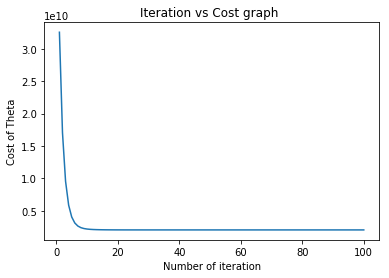

[[339119.45652174 110248.8787409   -6226.18378776]]


In [ ]:
alpha = 0.3
iteration = 100
theta = gradient_descent(x_bias,y,theta,alpha,iteration)
print(theta)

In [ ]:
X_predict = np.array([[1.0,1650.0,3],[1.0,1600.0,4]]) 
#feature scaling the data first
X_predict[::,1:2] = (X_predict[::,1:2] - mean_size)/ (std_size) 
X_predict[::,2:] = (X_predict[::,2:]- mean_bedroom)/ (std_bedroom)
hypothesis = X_predict.dot(theta.transpose())
print("Cost of house with 1650 sq ft and 3 bedroom is and 1600 sq feet and 4 bedroom ",hypothesis)

Cost of house with 1650 sq ft and 3 bedroom is and 1600 sq feet and 4 bedroom  [[292195.80995823]
 [277071.6922915 ]]
